# Visible Nuller

- 円形開口の平面波を作り (pupa)-> コロナグラフ関数としてVisible Nullerを適用 -> 焦点面を算出(foca)するコード。

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pylab
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#from vcr/src
import plain_wave as pw
import mask_circular as mc
import visible_nuller as vn

## 星からの光を作る
星や惑星からの光は、位相のついた平面波で表される。on-axisは消え、off-axisは残るから、それぞれ２つの波面を作ろう

In [65]:
n=512 # sampling rate at a pupil
pos_star=[0.0,0.0] #angle in unit of lambda/D
pupa_star = pw.wg_plain_wave(n,pos_star)

pos_planet=[0.95/0.2/2,0.36] #angle in unit of lambda/D、Nullerのthroughput max近傍
pupa_planet = pw.wg_plain_wave(n,pos_planet)

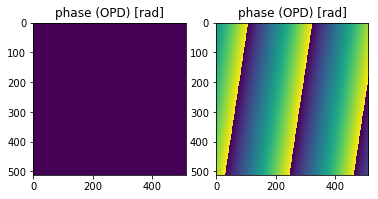

In [66]:
fig = plt.figure()
ax = fig.add_subplot(121)
q=ax.imshow(np.angle(pupa_star))
plt.title("phase (OPD) [rad]")
#plt.colorbar(q)
ax = fig.add_subplot(122)
q=ax.imshow(np.angle(pupa_planet))
plt.title("phase (OPD) [rad]")
#plt.colorbar(q)
plt.show()

## 円形開口マスク
望遠鏡のマスクはpupil to pupilの関数である

In [67]:
pupa_star=mc.p2p_circular(pupa_star)
pupa_planet=mc.p2p_circular(pupa_planet)

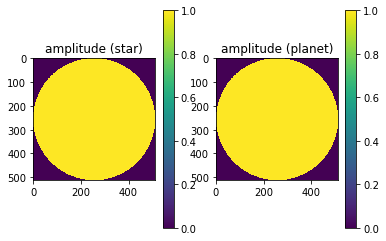

In [68]:
#表示

fig = plt.figure()
ax = fig.add_subplot(121)
q=ax.imshow(np.abs(pupa_star))
plt.title("amplitude (star)")
plt.colorbar(q)
ax = fig.add_subplot(122)
q=ax.imshow(np.abs(pupa_planet))
plt.title("amplitude (planet)")
plt.colorbar(q)
plt.show()

## Visible Nullerをかけてみる。
- 恒星と惑星のpupaを足してコロナグラフにかけてはならない。この２つはインコヒーレントなので複素振幅の状態では混ざらないことに注意

In [69]:
#恒星光
exprat=8 #oversampling factor at a focal plane
foca_star_null, foca_star_bright = vn.cf_vnuller_2beam(pupa_star,shearrate=0.2,exprat=exprat)

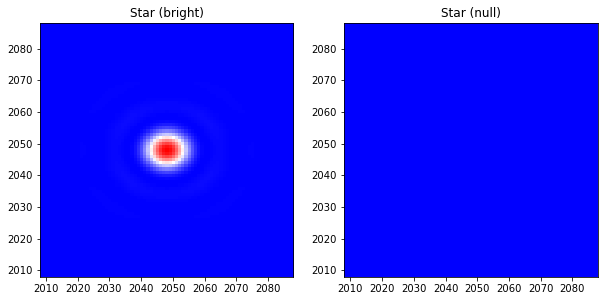

In [60]:
#表示
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(121)
a=ax.imshow(np.abs(foca_star_bright)**2,cmap="bwr")
nx=foca_star_bright.shape[0]
ny=foca_star_bright.shape[1]
plt.xlim(nx/2-5*exprat,nx/2+5*exprat)
plt.ylim(ny/2-5*exprat,ny/2+5*exprat)
plt.title("Star (bright)")
ax=fig.add_subplot(122)
a=ax.imshow(np.abs(foca_star_null)**2,cmap="bwr")
plt.xlim(nx/2-5*exprat,nx/2+5*exprat)
plt.ylim(ny/2-5*exprat,ny/2+5*exprat)
plt.title("Star (null)")
plt.show()

on-axis光はnull側では消えている

In [70]:
#惑星光
exprat=8 #oversampling factor at a focal plane
foca_planet_null, foca_planet_bright = vn.cf_vnuller_2beam(pupa_planet,exprat=exprat)

In [72]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

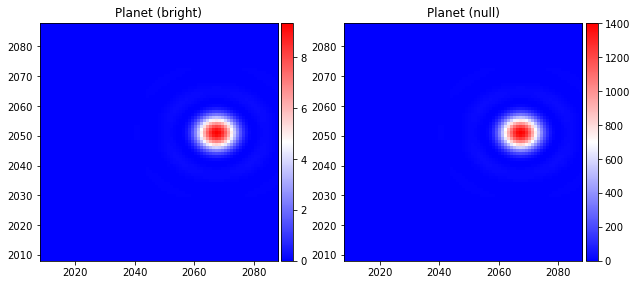

In [73]:
#表示
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(121)
a=ax.imshow(np.abs(foca_planet_bright)**2,cmap="bwr")
nx=foca_star_null.shape[0]
ny=foca_star_null.shape[1]
plt.xlim(nx/2-5*exprat,nx/2+5*exprat)
plt.ylim(ny/2-5*exprat,ny/2+5*exprat)
plt.title("Planet (bright)")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(a, cax=cax)
ax=fig.add_subplot(122)
a=ax.imshow(np.abs(foca_planet_null)**2,cmap="bwr")
plt.xlim(nx/2-5*exprat,nx/2+5*exprat)
plt.ylim(ny/2-5*exprat,ny/2+5*exprat)
plt.title("Planet (null)")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(a, cax=cax)
plt.show()

In [74]:
#total throughtputは重ならない部分のリオストップ分減少する。
throughput=(np.sum(np.abs(foca_planet_null)**2)+np.sum(np.abs(foca_planet_bright)**2))\
/(np.sum(np.abs(pupa_planet)**2))
print(throughput)

0.748075138809


## 惑星＋恒星
惑星＋恒星をみるにはfocaの自乗をとってから和を取ればいい

In [75]:
contrast=0.001
all_null=np.abs(foca_star_null)**2+contrast*np.abs(foca_planet_null)**2
all_bright=np.abs(foca_star_bright)**2+contrast*np.abs(foca_planet_bright)**2

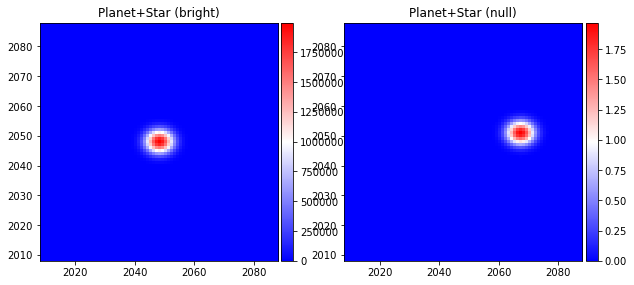

In [77]:
#表示
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(121)
a=ax.imshow(np.abs(all_bright)**2,cmap="bwr")
nx=foca_star_null.shape[0]
ny=foca_star_null.shape[1]
plt.xlim(nx/2-5*exprat,nx/2+5*exprat)
plt.ylim(ny/2-5*exprat,ny/2+5*exprat)
plt.title("Planet+Star (bright)")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(a, cax=cax)
ax=fig.add_subplot(122)
a=ax.imshow(np.abs(all_null)**2,cmap="bwr")
plt.xlim(nx/2-5*exprat,nx/2+5*exprat)
plt.ylim(ny/2-5*exprat,ny/2+5*exprat)
plt.title("Planet+Star (null)")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(a, cax=cax)
plt.show()